In [11]:
import glob
import h5py
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import seaborn as sns

In [12]:
path = glob.glob(r"C:\Users\adsmith23\Desktop\Entropy_Analysis\o3_cl2_h5data\*_5.0_*.h5")
path

['C:\\Users\\adsmith23\\Desktop\\Entropy_Analysis\\o3_cl2_h5data\\594.0_5.0_5.0.h5',
 'C:\\Users\\adsmith23\\Desktop\\Entropy_Analysis\\o3_cl2_h5data\\595.0_5.0_5.0.h5',
 'C:\\Users\\adsmith23\\Desktop\\Entropy_Analysis\\o3_cl2_h5data\\597.0_5.0_5.0.h5',
 'C:\\Users\\adsmith23\\Desktop\\Entropy_Analysis\\o3_cl2_h5data\\598.0_5.0_0.0.h5',
 'C:\\Users\\adsmith23\\Desktop\\Entropy_Analysis\\o3_cl2_h5data\\600.0_5.0_0.0.h5',
 'C:\\Users\\adsmith23\\Desktop\\Entropy_Analysis\\o3_cl2_h5data\\601.0_5.0_0.0.h5',
 'C:\\Users\\adsmith23\\Desktop\\Entropy_Analysis\\o3_cl2_h5data\\602.0_5.0_1.0.h5',
 'C:\\Users\\adsmith23\\Desktop\\Entropy_Analysis\\o3_cl2_h5data\\603.0_5.0_1.0.h5',
 'C:\\Users\\adsmith23\\Desktop\\Entropy_Analysis\\o3_cl2_h5data\\604.0_5.0_1.0.h5',
 'C:\\Users\\adsmith23\\Desktop\\Entropy_Analysis\\o3_cl2_h5data\\605.0_5.0_2.0.h5',
 'C:\\Users\\adsmith23\\Desktop\\Entropy_Analysis\\o3_cl2_h5data\\607.0_5.0_2.0.h5',
 'C:\\Users\\adsmith23\\Desktop\\Entropy_Analysis\\o3_cl2_h5data\

In [13]:
f = h5py.File(path[4])
p = list(f.keys())
dset = np.asarray(f[p[0]])

C:\Users\adsmith23\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [14]:
cool = np.asarray(dset)

for i in tqdm([15]):

    print((i/dset.shape[1])*100)

    dottings = []

    images = []

    imgray = []
    
    for j in range(dset.shape[0]):

        image = cool[j,i,:,:,:]

        intensity = image[:,:,0]*.3 + image[:,:,1]*.59 + image[:,:,2]*0.11

        aimage = image[:,:,0]*.7 + image[:,:,1]*-.5 + image[:,:,2]*-.3
        
        images.append(aimage)
        
        imgray.append(intensity)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.37it/s]

46.875


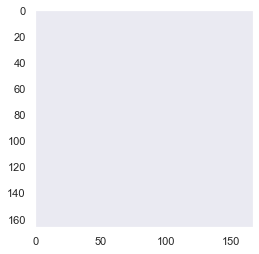

In [15]:
import matplotlib 
import matplotlib.animation as animation 
sns.set(style = "dark")
fig = plt.figure()
ims = []
for i in range(len(images)):
    img = imgray[i]
#     img = V[:,:].T@ProjTS[i,:]
#     ims.append([plt.imshow(img.reshape(50,50))])
    ims.append([plt.imshow(img)])
    
im_ani = animation.ArtistAnimation(fig, ims)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)
im_ani.save('CL4.mp4', writer=writer)
plt.show()

In [16]:
len(images)

254

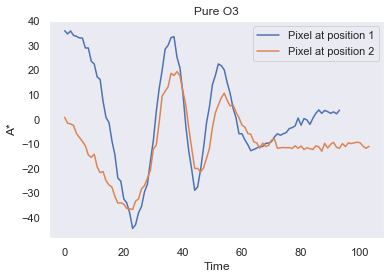

In [17]:
group1 = np.zeros(len(images))
group2 = np.zeros(len(images))

for i in range(len(images)):
    group1[i] = images[i][80,80]
    group2[i] = images[i][140,120]
    
plt.plot(group1[160:],label= "Pixel at position 1")
plt.plot(group2[150:],label= "Pixel at position 2")
plt.xlabel("Time")
plt.ylabel("A*")
plt.title("Pure O3")
plt.legend()

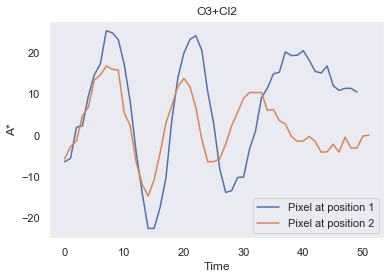

In [10]:
group1 = np.zeros(len(images))
group2 = np.zeros(len(images))

for i in range(len(images)):
    group1[i] = images[i][60,60]
    group2[i] = images[i][125,90]

plt.plot(group1[100:150],label="Pixel at position 1")
plt.plot(group2[98:150],label="Pixel at position 2")
plt.xlabel("Time")
plt.ylabel("A*")
plt.title("O3+Cl2")
plt.legend()
